# Plot sinogram

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [24]:
plt.rcParams.update({'font.size': 16})

In [34]:
def plot_sinogram_slice(im, slice):
    sinogram = np.moveaxis(im, 0, -1)
    dx, dy = 0.5 * 180.0 / max(im.shape), 0.5 / sinogram.shape[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

    ax1.imshow(im[0], cmap=plt.cm.Greys_r)
#     ax1.set_title('Projection image (front)')
    ax1.axhline(y = slice, color = '#4b0059', linestyle = '--')
    ax1.xaxis.set_major_locator(plt.NullLocator())
    ax1.yaxis.set_major_locator(plt.NullLocator())

#     ax2.set_title(f"Sinogram (slice {slice})")
    ax2.set_xlabel("Projection angle (deg)")
    ax2.yaxis.set_major_locator(plt.NullLocator())
#     ax2.set_ylabel("Projection position (pixels)")
    plt.imshow(sinogram[slice], cmap=plt.cm.Greys_r,
            extent=(-dx, 360.0 + dx, sinogram[slice].shape[0] + dy, -dy),
            aspect='auto', origin='upper')
    
    fig.tight_layout()

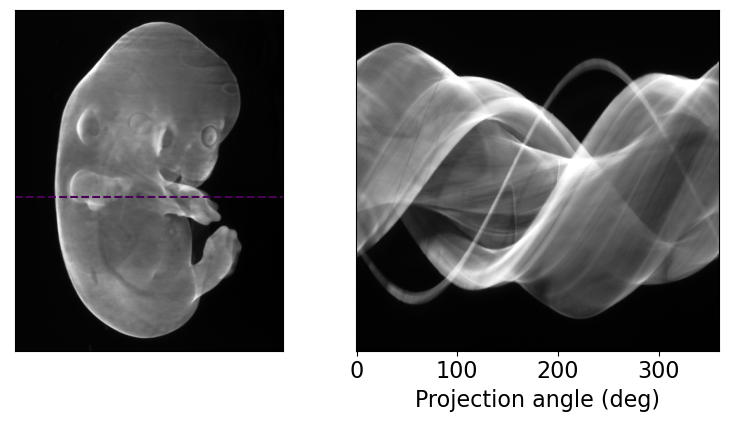

In [35]:
im = io.imread(r'D:\MSci_Project\1_Data\MSc_OPT_test_data_aligned.tif')
plot_sinogram_slice(im, 390)
plt.savefig('sinogram.png', dpi=1000)

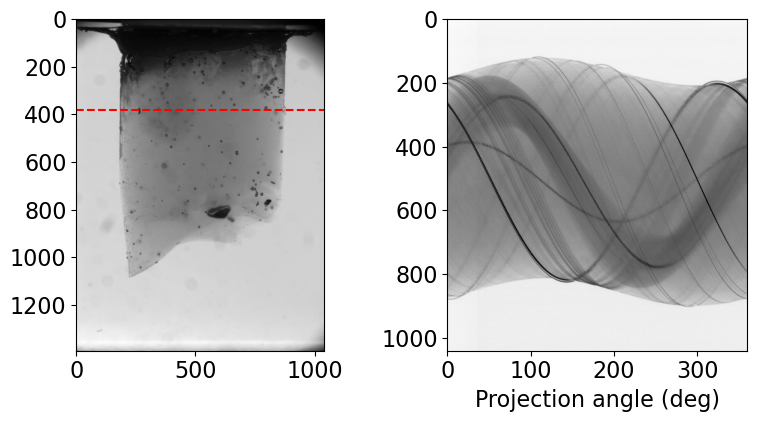

In [27]:
im = io.imread(r'D:\MSci_Project\1_Data\2022-12-01 broken phantom\1_2\1_2_MMStack_Pos0.ome.tif')
plot_sinogram_slice(im, 380)

In [28]:
# im = io.imread(r'D:\MSci_Project\1_Data\MSc_OPT_test_data_aligned.tif')

In [29]:
# # adapted from https://stackoverflow.com/a/19476891

# import visvis as vv

# imgdata = np.rot90(im[0], 3)

# nr, nc = imgdata.shape[:2]
# x,y = np.mgrid[:nr, :nc]
# z = np.ones((nr, nc))

# for ii in range(5):
#     vv.functions.surf(x, z*ii*100, y, imgdata, aa=3)

# app = vv.use()
# app.Run()